# Análisis exploratorio

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('df_challenge_meli.csv')

In [50]:
#Aseguramos reproducibilidad global en el código, no solo en los modelos
np.random.seed(42)

In [51]:
df.head()

,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
2,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO
3,2024-08-01,5a39342818,Limpiador Cerave Control Imperfecciones Para P...,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-18485...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
4,2024-08-01,5a39342818,Labial Líquido Maybelline Super Stay Matte Ink...,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP,https://articulo.mercadolibre.com.mx/MLM-15825...,FRAGRANCES & MAKE UP,FRAGANCIAS Y MAQUILLAJE


In [52]:
#Verificar que haya cargado la cantidad de filas y columnas que vimos en el csv, en este caso 185250 filas y 14 columnas
df.shape

(185250, 14)

In [53]:
#Queremos saber que tipos de datos vienen en la base para su tratamiento
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB


In [54]:
#Se quiere mirar el comportamiento general de las variables númericas para saber como encarar el modelo de clusterización y mitigar efectos de outliers
df.describe()

,stock,price,regular_price
count,185250.000000,1.837340e+05,49956.000000
mean,307.017090,3.701531e+04,1614.429170
std,3367.216679,1.124158e+07,8408.645951
min,0.000000,0.000000e+00,6.100000
25%,2.000000,2.700000e+02,278.672500
50%,8.000000,5.681000e+02,499.000000
75%,42.000000,1.387000e+03,1099.990000
max,99999.000000,4.772354e+09,999999.000000


In [55]:
#Validar el distinct de valores en cada columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

tim_day: 1 valores únicos
seller_nickname: 46586 valores únicos
titulo: 174746 valores únicos
seller_reputation: 9 valores únicos
stock: 3609 valores únicos
logistic_type: 5 valores únicos
condition: 3 valores únicos
is_refurbished: 2 valores únicos
price: 36529 valores únicos
regular_price: 12109 valores únicos
categoria: 54 valores únicos
url: 185250 valores únicos
category_id: 54 valores únicos
category_name: 54 valores únicos


In [56]:
df.category_name.value_counts()

,count
category_name,
DEPORTES,14252
SALUD,12587
"LIBROS, MULTIMEDIA Y OTROS",10355
JUGUETES Y JUEGOS,10251
ACCESORIOS PARA AUTOS Y CAMIONETAS,10128
OTROS,7797
ELECTRODOMÉSTICOS,7090
ANTIGÜEDADES Y PASATIEMPOS,6453
ARTÍCULOS DEL HOGAR,5569


In [57]:
df.seller_reputation.value_counts()

,count
seller_reputation,
green_platinum,69625
green,33838
green_gold,28332
green_silver,24731
newbie,9221
yellow,7245
red,4219
light_green,3101
orange,2566


In [58]:
df.isnull().sum()
# la cantidad de regular_price null puede dejar muchos productos sin descuento

,0
tim_day,0
seller_nickname,0
titulo,0
seller_reputation,2372
stock,0
logistic_type,0
condition,0
is_refurbished,0
price,1516
regular_price,135294


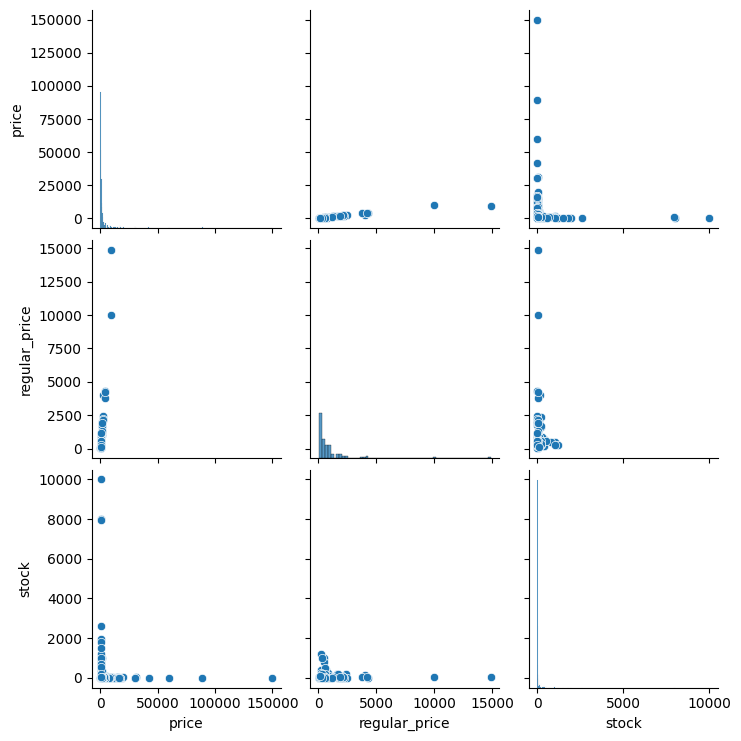

In [59]:
# La diagonal con los histogramas alerta de los outliers con valores altisimos
# En la siguiente línea se testean dos histogramas con muestras para poder ver una distribución más clara
num_cols = ['price','regular_price','stock']

muestra = df.sample(500)
sns.pairplot(muestra[num_cols], diag_kind="hist")

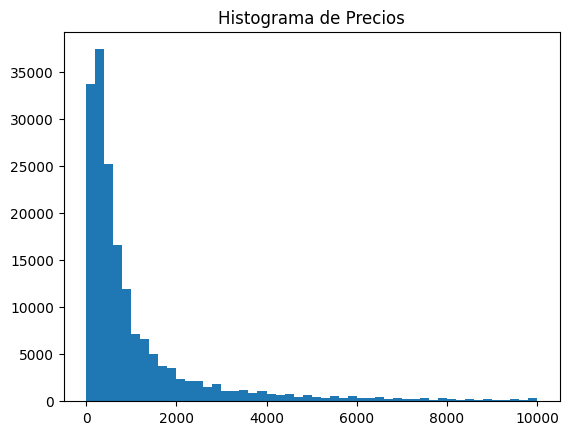

In [60]:
plt.hist(df.price, bins=50, range=(0, 10000))
plt.title('Histograma de Precios')
plt.show()

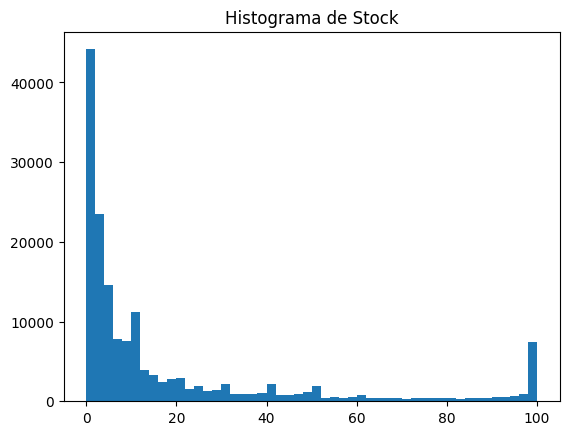

In [61]:
plt.hist(df.stock, bins=50, range=(0, 100))
plt.title('Histograma de Stock')
plt.show()

In [62]:
#Escaneo de precios, dado que en el histograma inicial todo se concentraba en valores cercanos a 2000. Presencia de valores muy extremos vs la media
df.price.sort_values(ascending=False).iloc[0:1000]

,price
129575,4.772354e+09
119991,5.000000e+08
116998,3.500000e+08
124519,2.431780e+08
125671,7.194236e+07
...,...
123106,5.000000e+04
180920,4.999900e+04
136044,4.999500e+04
48119,4.990000e+04


In [63]:
#Revisión de filas con stock = 0 dado que esto puede determinar un curso importante en la segmentación
df.stock.sort_values(ascending=False).iloc[0:1000]
(df['stock'] == 0).sum()

np.int64(6033)

<Axes: xlabel='seller_nickname,stock'>

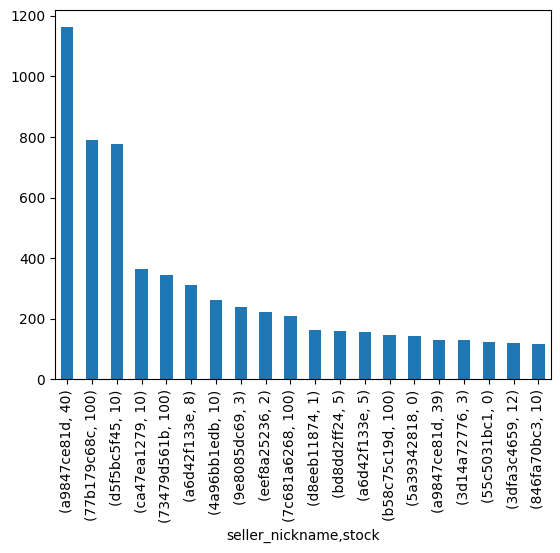

In [64]:
df.groupby('seller_nickname')['stock'].value_counts().nlargest(20).plot(kind='bar')

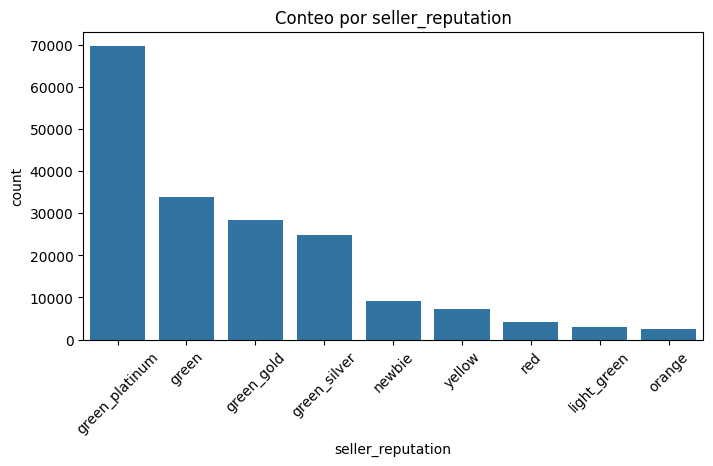

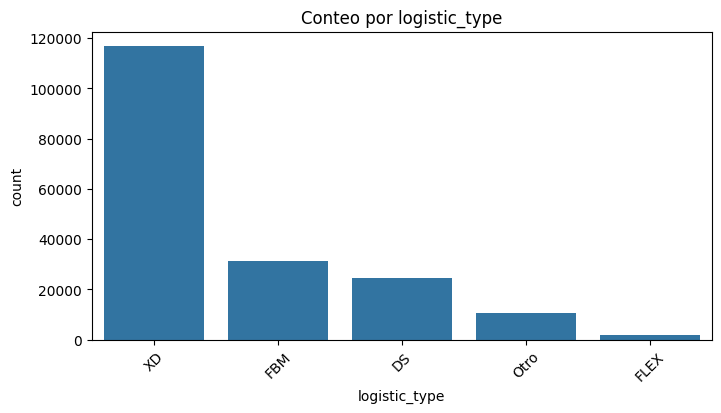

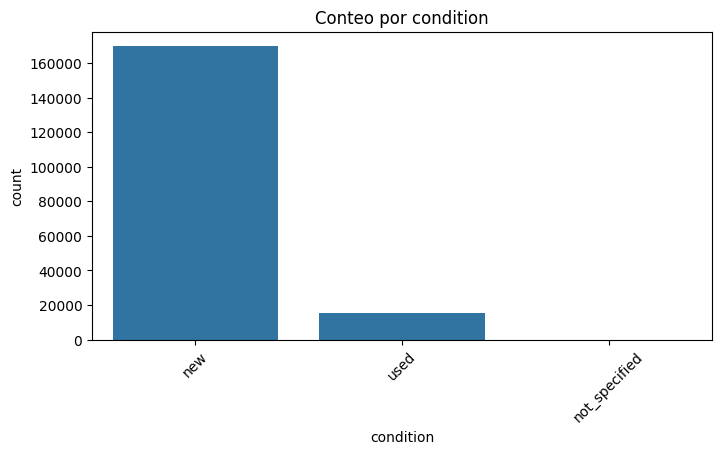

In [65]:
cat_cols = ['seller_reputation','logistic_type','condition']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Conteo por {col}")
    plt.show()

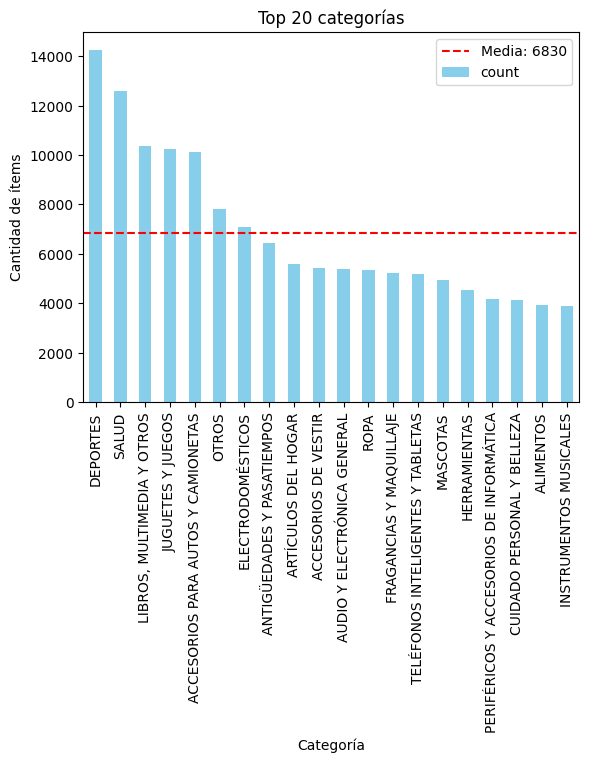

In [66]:
##top_10 = df['category_name'].value_counts().nlargest(10)

df['category_name'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 categorías")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ítems")

media = df['category_name'].value_counts().nlargest(20).mean()
plt.axhline(media, color='red', linestyle='--', label=f'Media: {media:.0f}')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

Consideraciones del análisis exploratorio de datos:
Hay 6033 filas donde no hay stock de los productos, sin embargo no se borraron dado que el análisis es por vendedor y no por producto.
Adicionalmente, el precio tiene un rango demasiado amplio por precios muy altos, esto puede influir en el resultado posterior del modelo, sin embargo, no se eliminaron para ver las diferentes distribuciones

# Feature Engineering

In [67]:
df.head()

,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
2,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO
3,2024-08-01,5a39342818,Limpiador Cerave Control Imperfecciones Para P...,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-18485...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
4,2024-08-01,5a39342818,Labial Líquido Maybelline Super Stay Matte Ink...,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP,https://articulo.mercadolibre.com.mx/MLM-15825...,FRAGRANCES & MAKE UP,FRAGANCIAS Y MAQUILLAJE


In [68]:
df.drop(['tim_day','titulo','url','categoria','category_name'],axis=1, inplace=True)

In [69]:
df_1 = df.copy()
df_1.head()

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,category_id
0,5a39342818,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE
1,5a39342818,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE
2,66d9659692,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR
3,5a39342818,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE
4,5a39342818,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP


In [70]:
df_1['seller_reputation'] = df_1['seller_reputation'].fillna('otro')
df_1.seller_reputation.value_counts()

,count
seller_reputation,
green_platinum,69625
green,33838
green_gold,28332
green_silver,24731
newbie,9221
yellow,7245
red,4219
light_green,3101
orange,2566


In [71]:
#Creamos reputaciones numéricas para cada categoría
reputation_map = {
    'green_platinum': 10,
    'green_gold': 9,
    'green_silver': 8,
    'green': 7,
    'light_green': 6,
    'red': 5,
    'orange': 4,
    'yellow': 3,
    'newbie': 2,
    'otro': 1
}

df_1['reputation_score'] = df_1['seller_reputation'].map(reputation_map)
df_1.head()

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,category_id,reputation_score
0,5a39342818,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE,10
1,5a39342818,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,10
2,66d9659692,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR,10
3,5a39342818,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE,10
4,5a39342818,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP,10


In [72]:
#Creamos una columna que puede ser entendida como productos con descuento cuando el precio es menor al precio regular del catalogo
#Asumimos que cuando el precio regular no viene (Nan) se toma el precio actual
#Se convierten las categorias en números para el modelo, aunque no se vayan a usar todas es mejor categorizarlas numéricamente
df_1['has_discount'] = np.where(df_1['price'] < df_1['regular_price'], 1, 0).astype(int)
df_1['is_refurbished'] = df_1['is_refurbished'].apply(lambda x: 1 if x == True else 0)
df_1['condition'] = df_1['condition'].apply(lambda x: 1 if x == 'new' else (2 if x == 'used' else 3))
df_1['logistic_type'] = df_1['logistic_type'].apply(lambda x: 1 if x == 'FBM' else (2 if x == 'DS' else (3 if x == 'XD' else 4)))
df_1.head()

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,category_id,reputation_score,has_discount
0,5a39342818,green_platinum,16155,1,1,0,260.93,355.00,BEAUTY PERSONAL CARE,10,1
1,5a39342818,green_platinum,6253,1,1,0,344.26,NaN,BEAUTY PERSONAL CARE,10,0
2,66d9659692,green_platinum,10066,1,1,0,363.00,660.00,HAIR,10,1
3,5a39342818,green_platinum,19678,1,1,0,241.00,410.00,BEAUTY PERSONAL CARE,10,1
4,5a39342818,green_platinum,4862,1,1,0,133.47,152.49,FRAGRANCES & MAKE UP,10,1


In [73]:
df_1.head()
df_1.logistic_type.value_counts()

,count
logistic_type,
3,116763
1,31483
2,24645
4,12359


In [74]:
#Asumimos que donde no venía regular price se toma el precio de catalogo, en este caso concuerda la lógica del descuento
#Creamos el logaritmo de price y stock por su distribución asimétrica y outliers en el extremo superior
#Usamos log1p en lugar de log por los valores en 0
df_1['regular_price'] = df_1['regular_price'].fillna(df_1['price'])
df_1['log_price'] = np.log1p(df_1['price'])
df_1['log_stock'] = np.log1p(df_1['stock'])
df_1.head()

,seller_nickname,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,category_id,reputation_score,has_discount,log_price,log_stock
0,5a39342818,green_platinum,16155,1,1,0,260.93,355.00,BEAUTY PERSONAL CARE,10,1,5.568077,9.690047
1,5a39342818,green_platinum,6253,1,1,0,344.26,344.26,BEAUTY PERSONAL CARE,10,0,5.844298,8.740977
2,66d9659692,green_platinum,10066,1,1,0,363.00,660.00,HAIR,10,1,5.897154,9.217018
3,5a39342818,green_platinum,19678,1,1,0,241.00,410.00,BEAUTY PERSONAL CARE,10,1,5.488938,9.887307
4,5a39342818,green_platinum,4862,1,1,0,133.47,152.49,FRAGRANCES & MAKE UP,10,1,4.901341,8.489411


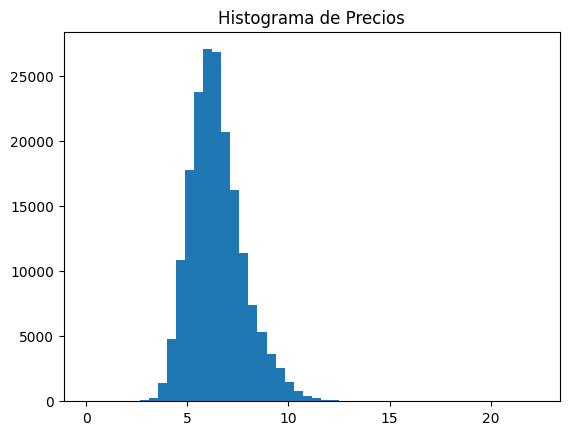

In [75]:
plt.hist(df_1.log_price, bins=50)
plt.title('Histograma de Precios')
plt.show()

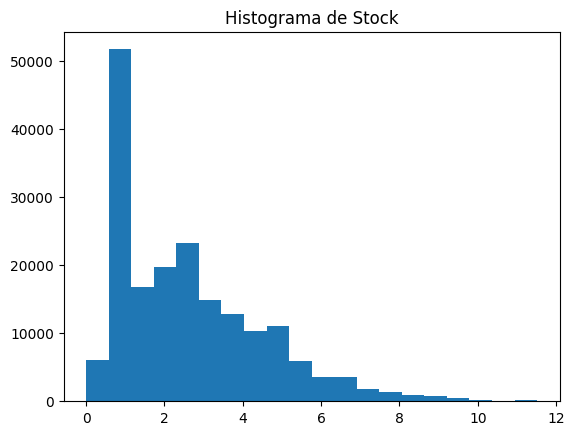

In [76]:
plt.hist(df_1.log_stock, bins=20)
plt.title('Histograma de Stock')
plt.show()

#Modelo de Clustering

In [77]:
df_sellers = df_1.groupby('seller_nickname').agg(
    avg_prod_price = ('log_price', 'mean'),
    max_prod_price = ('log_price', 'max'),
    ##std_prod_price = ('log_price', 'std'),
    avg_stock = ('log_stock', 'mean'),
    unique_cat = ('category_id', 'nunique'),
    reputation_score = ('reputation_score', 'mean'),
    ##condition_new_ratio = ('condition', lambda x: (x == '1').mean()),
    has_discount_ratio = ('has_discount', 'mean')
).reset_index()

df_sellers = df_sellers.fillna(0)

In [78]:
df_sellers.head()

,seller_nickname,avg_prod_price,max_prod_price,avg_stock,unique_cat,reputation_score,has_discount_ratio
0,000631669c,6.684612,6.684612,2.397895,1,2.0,0.0
1,0007153bca,5.991465,5.991465,3.348517,1,7.0,0.0
2,000bee3c3b,5.761745,6.393591,0.000000,1,2.0,0.0
3,000df2bd02,7.346655,7.346655,1.791759,1,7.0,0.0
4,000e27cea2,6.060845,6.431331,1.354025,2,8.0,0.0


In [79]:
df_sellers.has_discount_ratio.value_counts()

,count
has_discount_ratio,
0.000000,32431
1.000000,8882
0.500000,1100
0.666667,535
0.333333,443
...,...
0.014925,1
0.518519,1
0.212121,1


Escala y normalización

In [80]:
from sklearn.preprocessing import StandardScaler

variables_a_escalar = df_sellers.drop('seller_nickname', axis=1).columns
scaler = StandardScaler()
var_escaladas = scaler.fit_transform(df_sellers[variables_a_escalar])
df_escaladas = pd.DataFrame(var_escaladas, columns=variables_a_escalar)
df_escaladas.head()

,avg_prod_price,max_prod_price,avg_stock,unique_cat,reputation_score,has_discount_ratio
0,0.057250,-0.176487,0.013342,-0.380647,-1.534274,-0.609534
1,-0.410946,-0.612863,0.528830,-0.380647,0.243976,-0.609534
2,-0.566114,-0.359701,-1.286949,-0.380647,-1.534274,-0.609534
3,0.504436,0.240307,-0.315343,-0.380647,0.243976,-0.609534
4,-0.364082,-0.335942,-0.552711,0.163939,0.599626,-0.609534


In [81]:
#Esto es un control para ver que la escala normalización y escala se haya aplicado correctamente
print(f'Media del df con var escaladas:', df_escaladas.mean().round(3))
print(f'Desviación estándar del df con var escaladas:', df_escaladas.std().round(3))

Media del df con var escaladas: avg_prod_price       -0.0
max_prod_price        0.0
avg_stock             0.0
unique_cat           -0.0
reputation_score     -0.0
has_discount_ratio   -0.0
dtype: float64
Desviación estándar del df con var escaladas: avg_prod_price        1.0
max_prod_price        1.0
avg_stock             1.0
unique_cat            1.0
reputation_score      1.0
has_discount_ratio    1.0
dtype: float64


In [82]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3, random_state=42)
clusters = modelo.fit_predict(df_escaladas)
df_sellers['cluster_modelo'] = clusters

print(df_sellers['cluster_modelo'].value_counts())

cluster_modelo
0    21935
1    12484
2    12167
Name: count, dtype: int64


In [83]:
df_sellers['cluster_modelo'] = df_sellers['cluster_modelo'].astype(int)
df_sellers.dtypes

,0
seller_nickname,object
avg_prod_price,float64
max_prod_price,float64
avg_stock,float64
unique_cat,int64
reputation_score,float64
has_discount_ratio,float64
cluster_modelo,int64


In [84]:
df_sellers_1 = df_sellers.copy()

In [85]:
df_sellers_1.drop('seller_nickname', axis=1, inplace=True)

In [86]:
resumen_cluster = df_sellers_1.groupby('cluster_modelo').mean().round(2)
print(resumen_cluster)

                avg_prod_price  max_prod_price  avg_stock  unique_cat  \
cluster_modelo                                                          
0                         5.98            6.28       2.43        1.42   
1                         5.98            6.51       3.45        2.58   
2                         8.35            8.66       1.16        1.30   

                reputation_score  has_discount_ratio  
cluster_modelo                                        
0                           6.47                0.02  
1                           8.38                0.86  
2                           3.90                0.03  


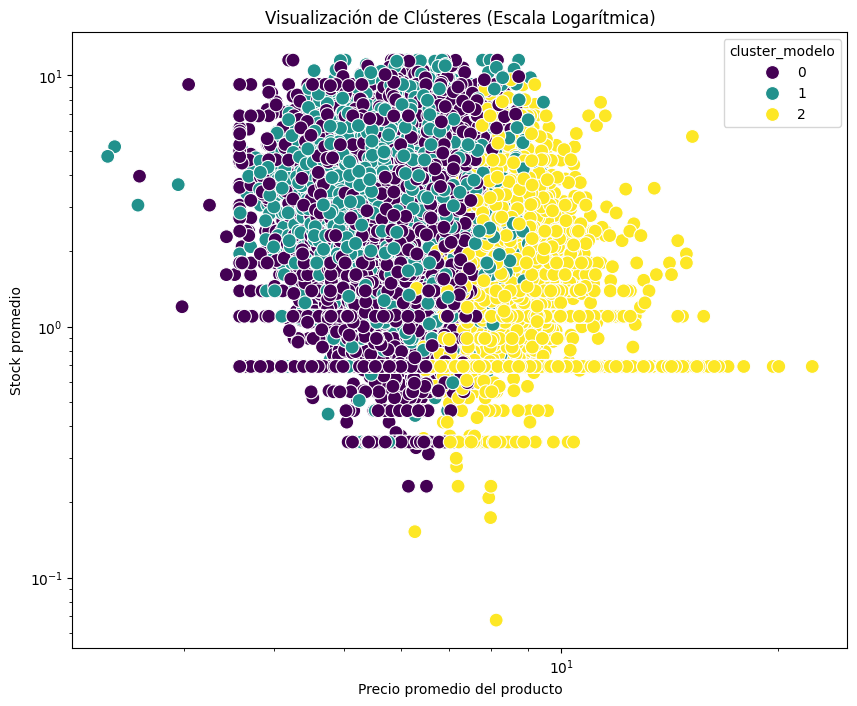

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='avg_prod_price',
    y='avg_stock',
    hue='cluster_modelo',
    data=df_sellers,
    palette='viridis',
    s=100
)
plt.title('Visualización de Clústeres (Escala Logarítmica)')
plt.xlabel('Precio promedio del producto')
plt.ylabel('Stock promedio')

# Aplica escala logarítmica a los ejes para manejar la alta varianza
plt.xscale('log')
plt.yscale('log')

plt.show()

Evaluación de clústers


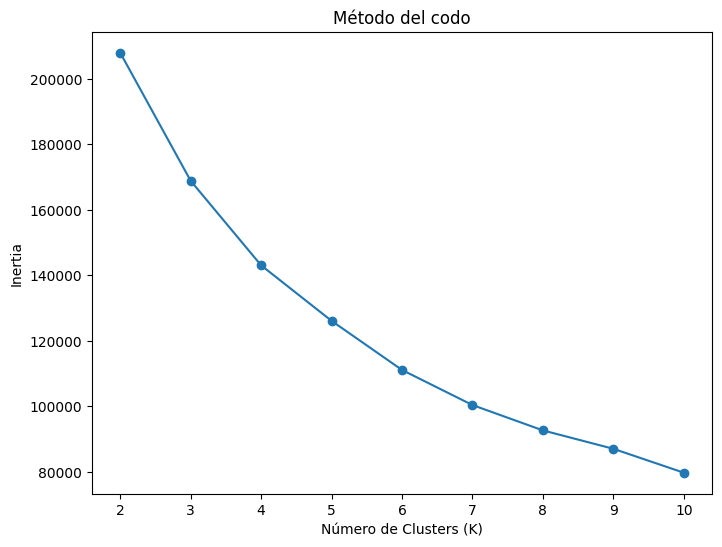

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2,11):
    cluster_optimo = KMeans(n_clusters=k, random_state=42, n_init = 10)
    cluster_optimo.fit(df_escaladas)
    inertia.append(cluster_optimo.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

Según los resultados de la gráfica, se sugiere usar 4 clústeres porque la inclinación de ahí en adelante es menos pronunciada y haría cada grupo menos compacto

El argumento n_init se estableció en 10 iteraciones, encontrando el resultado del análisis de la gráfica más pertinente que con un número menor de iteraciones.

In [89]:
"""from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_escaladas)
    score = silhouette_score(df_escaladas, labels)
    print(f"k={k}: Silhouette Score={score:.3f}")
"""


'from sklearn.metrics import silhouette_score\nfrom sklearn.cluster import KMeans\n\nfor k in range(2, 11):\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    labels = kmeans.fit_predict(df_escaladas)\n    score = silhouette_score(df_escaladas, labels)\n    print(f"k={k}: Silhouette Score={score:.3f}")\n'

Se midió la calidad del clúster con el Silhouette Score calculando que tan similares son los puntos entre su cluster y que tan difenrente de los otros clusters. Si bien todos gravitan alrededor de 0.26 no siempre más k's garantiza una mejor segmentación.

En este caso consideré apropiado junto con el método el codo asignar 4 grupos distintos (score = 0.276), dado que de cara a generar estrategias comerciales tener más grupos podría desencadenar en una poca diferenciación y ambiguedad entre grupos.

Modelo con el número óptimo de k

In [90]:
# Usamos el modelo con el número óptimo de clústeres
# Su usa el mismo número de inicializaciones, con una semilla de 42 para asegurar la reproducibilidad del resultado
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=4, random_state=42)
clusters = modelo.fit_predict(df_escaladas)
df_sellers['cluster_modelo'] = clusters

print(df_sellers['cluster_modelo'].value_counts())

df_sellers['cluster_modelo'] = df_sellers['cluster_modelo'].astype(int)
df_sellers.dtypes

"""
Clusters usados para las estrategias y la presentación:
0: 17808
3: 11856
1: 10088
2: 6834
 """

cluster_modelo
0    21790
2    12027
1    11010
3     1759
Name: count, dtype: int64


'\nClusters usados para las estrategias y la presentación:\n0: 17808\n3: 11856\n1: 10088\n2: 6834\n '

In [91]:
df_sellers_2 = df_sellers.copy()

In [92]:
df_sellers_2.drop('seller_nickname', axis=1, inplace=True)

In [93]:
resumen_cluster = df_sellers_2.groupby('cluster_modelo').mean().round(2)
print(resumen_cluster)

                avg_prod_price  max_prod_price  avg_stock  unique_cat  \
cluster_modelo                                                          
0                         5.98            6.27       2.45        1.38   
1                         5.96            6.34       3.43        1.73   
2                         8.36            8.64       1.15        1.21   
3                         6.32            7.99       3.27        8.76   

                reputation_score  has_discount_ratio  
cluster_modelo                                        
0                           6.47                0.02  
1                           8.30                0.92  
2                           3.86                0.03  
3                           8.79                0.37  


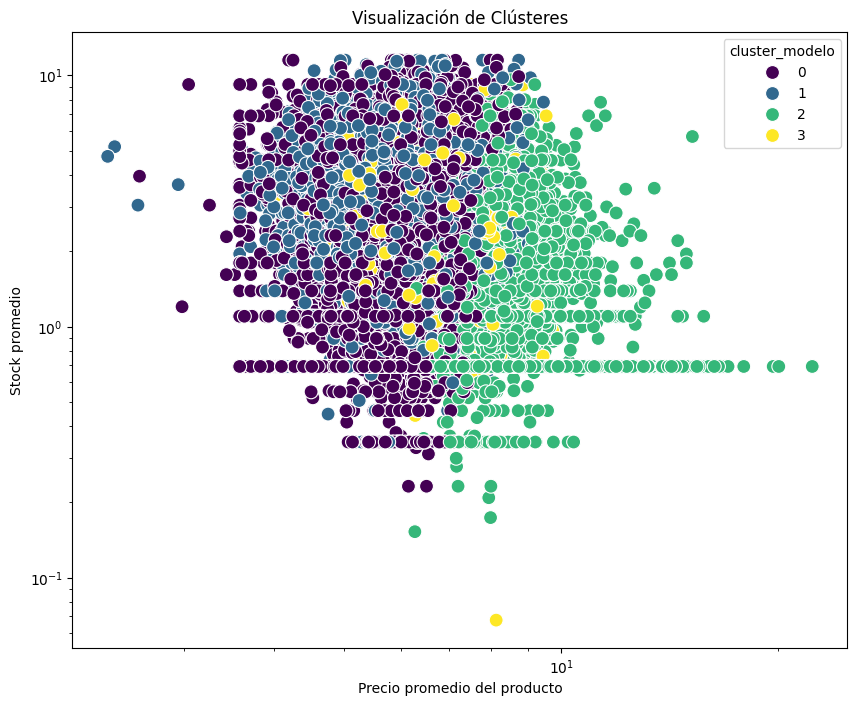

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='avg_prod_price',
    y='avg_stock',
    hue='cluster_modelo',
    data=df_sellers,
    palette='viridis',
    s=100
)

plt.title('Visualización de Clústeres')
plt.xlabel('Precio promedio del producto')
plt.ylabel('Stock promedio')

plt.xscale('log')
plt.yscale('log')

plt.show()



# Extensión Gen AI



In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
df_sellers['text_for_embedding'] = df_sellers.apply(
    lambda row: (
        f"El seller tiene un precio promedio de {row['avg_prod_price']} "
        f"(lo que es {'alto' if row['avg_prod_price'] > 6 else 'bajo'}), "
        f"stock promedio de {row['avg_stock']} unidades, "
        f"y aplica descuentos en el {row['has_discount_ratio']*100}% de sus productos. "
        f"Su reputación es {row['reputation_score']}/10 "
        f"y vende en {row['unique_cat']} categorías distintas."
    ),
    axis=1
)


In [ ]:
df_sellers['text_for_embedding'][0]

In [ ]:
df_sellers.head()

In [ ]:
# Vectorizamos el texto de cada vendedor, dividido en lotes para que no se quede pegado el pc
# Se puede demorar ~30 min en correr esta celda
embeddings = model.encode(df_sellers['text_for_embedding'].tolist(), batch_size=32, show_progress_bar=True)

In [ ]:
# Una vez creados los vectores númericos de las descripciones de los sellers, se corre la regresión logística para aprender a predecir a que cluster pertenecen los perfiles semánticos

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = embeddings
y = df_sellers['cluster_modelo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_logistica = LogisticRegression(random_state=42)
reg_logistica.fit(X_train, y_train)
y_pred = reg_logistica.predict(X_test)

print(reg_logistica.score(X_test, y_test)*100)

# El accuracy nos dice que tan bien predice el modelo

In [ ]:
prueba_vendedor = (
    "El seller tiene un precio promedio de 8.9 (lo que es alto), "
    "vende en 5 categorías distintas, "
    "su reputación es 6/10, "
    "tiene un stock promedio de 1.3 "
    "y aplica descuentos en el 25% de sus productos."
)

nuevo_vector = model.encode([prueba_vendedor])
prediccion_nuevo = reg_logistica.predict(nuevo_vector)
print("Este nuevo vendedor pertenece al clúster:", prediccion_nuevo[0])